In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
uk_updated=pd.read_csv("last.csv")
uk_updated['positivity_rate'] = uk_updated['daily_cases'] / (uk_updated['new_pcr_test'])
uk_updated['daily_cases_lag7'] = uk_updated['daily_cases'].shift(7)
uk_updated['new_pcr_test_7day_avg'] = uk_updated['new_pcr_test'].rolling(window=7).mean()
uk_updated['daily_cases_lag14'] = uk_updated['daily_cases'].shift(14)
uk_updated=uk_updated.fillna(0)
uk_updated['date'] = pd.to_datetime(uk_updated['date'])
uk_updated['ds'] = uk_updated['date']
uk_updated['y'] = uk_updated['cum_cases']
uk_updated['days'] = (uk_updated['date'] - uk_updated['date'].min()).dt.days

covid_dataset=uk_updated

C:\Users\enesk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
covid_dataset

,Unnamed: 0.1,Unnamed: 0,date,area_name,daily_cases,cum_cases,new_first_episode,cum_first_episode,new_reinfections,cum_reinfections,new_pcr_test,cum_pcr_test,test_roll_pos_pct,test_roll_people,new_first_dose,cum_first_dose,new_second_dose,cum_second_dose,new_third_dose,cum_third_dose,new_admissions,cum_admissions,First_lockdown,Second_lockdown,Third_lockdown,Omicron_Flag,positivity_rate,daily_cases_lag7,new_pcr_test_7day_avg,daily_cases_lag14,ds,y,days
0,0,0,2020-01-03,England,0.0,0.0,0.0,0.0,0.0,0.0,281.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,2020-01-03,0.0,0
1,1,1,2020-01-04,England,0.0,0.0,0.0,0.0,0.0,0.0,135.0,422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,2020-01-04,0.0,1
2,2,2,2020-01-05,England,0.0,0.0,0.0,0.0,0.0,0.0,313.0,735.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,2020-01-05,0.0,2
3,3,3,2020-01-06,England,0.0,0.0,0.0,0.0,0.0,0.0,58.0,793.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,2020-01-06,0.0,3
4,4,4,2020-01-07,England,0.0,0.0,0.0,0.0,0.0,0.0,137.0,930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,2020-01-07,0.0,4
5,5,5,2020-01-08,England,0.0,0.0,0.0,0.0,0.0,0.0,40.0,970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,0.000000,0.0,2020-01-08,0.0,5
6,6,6,2020-01-09,England,0.0,0.0,0.0,0.0,0.0,0.0,6.0,976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,138.571429,0.0,2020-01-09,0.0,6
7,7,7,2020-01-10,England,0.0,0.0,0.0,0.0,0.0,0.0,21.0,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,101.428571,0.0,2020-01-10,0.0,7
8,8,8,2020-01-11,England,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,84.285714,0.0,2020-01-11,0.0,8
9,9,9,2020-01-12,England,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1071.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.000000,0.0,48.000000,0.0,2020-01-12,0.0,9


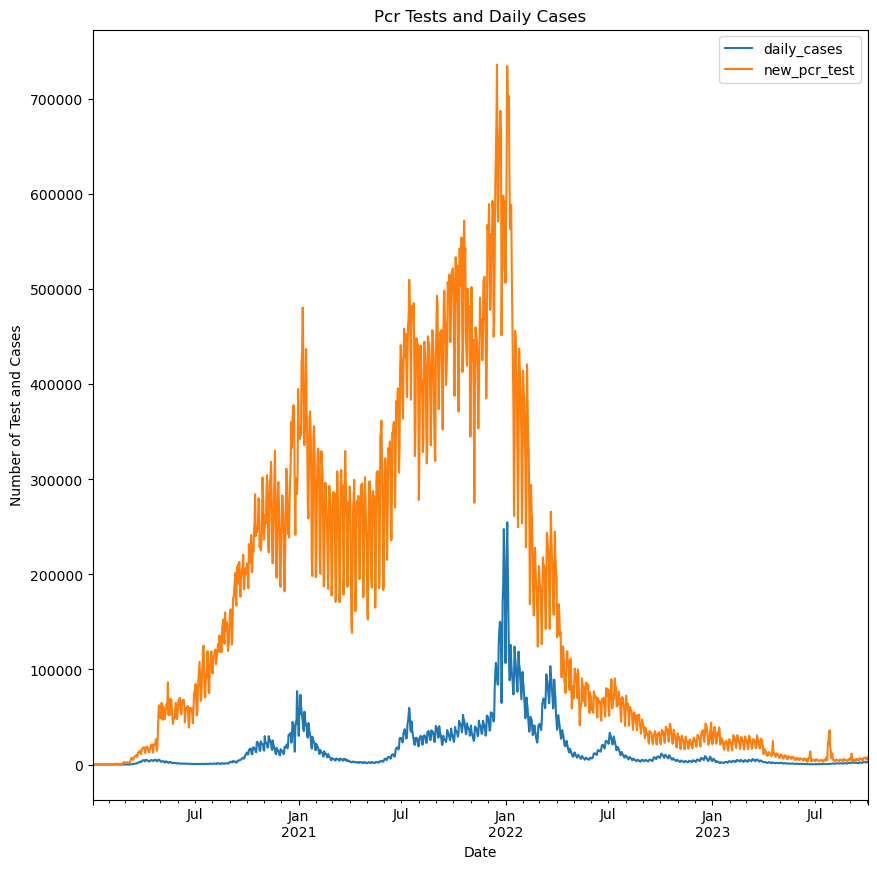

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
 
covid_dataset.plot(x="date", y=["daily_cases", "new_pcr_test"],
        kind="line", figsize=(10, 10),title="Pcr Tests and Daily Cases")
 
# Display plot
plt.show()

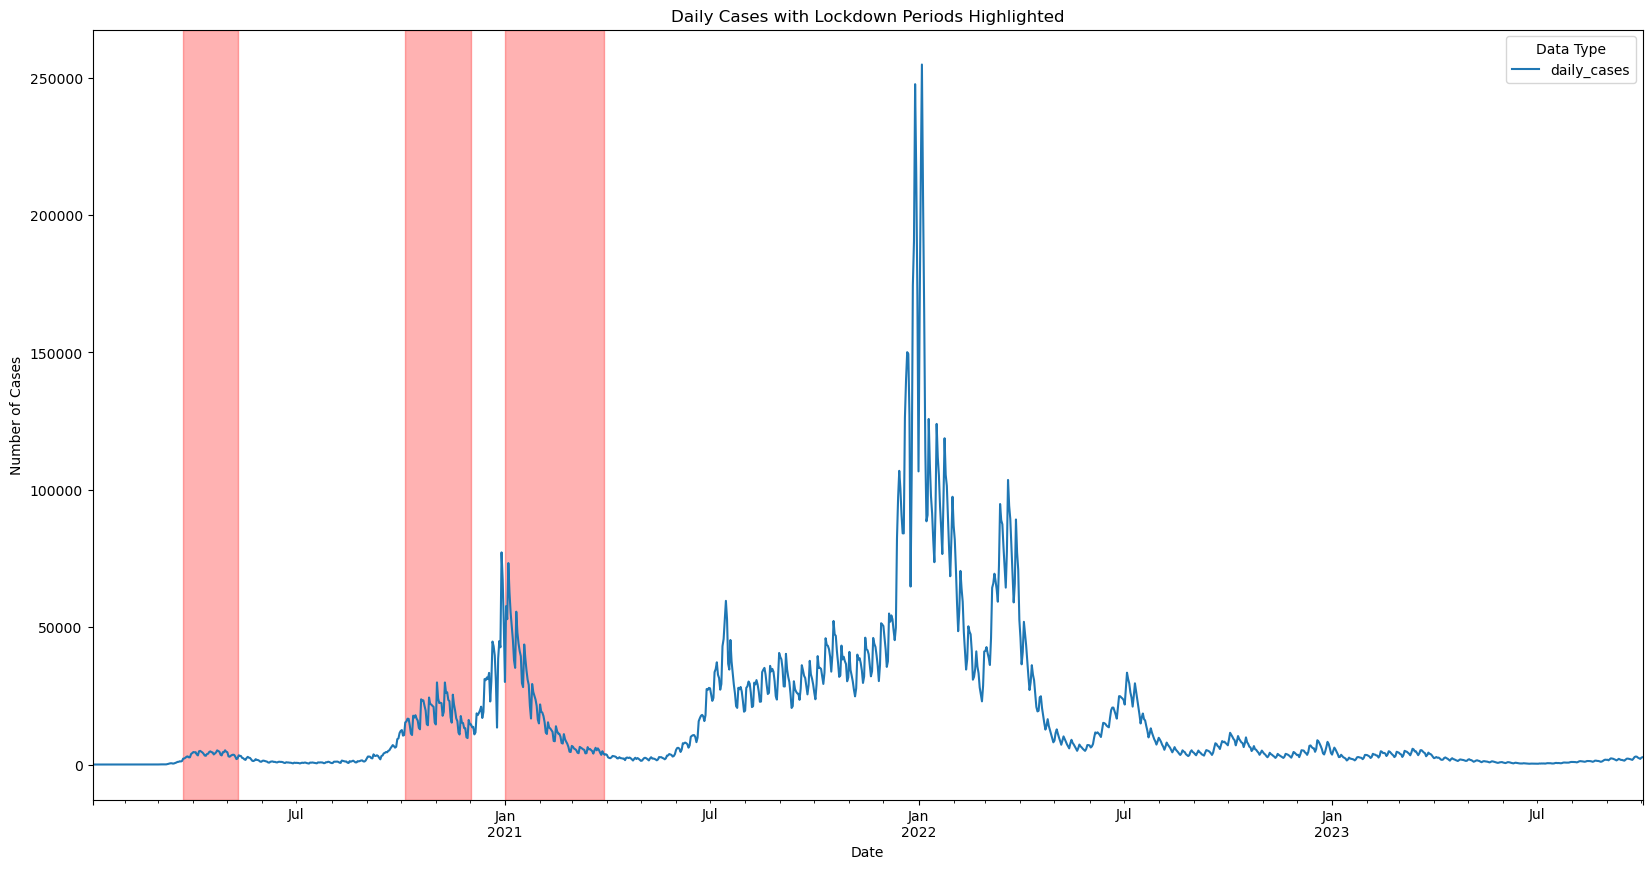

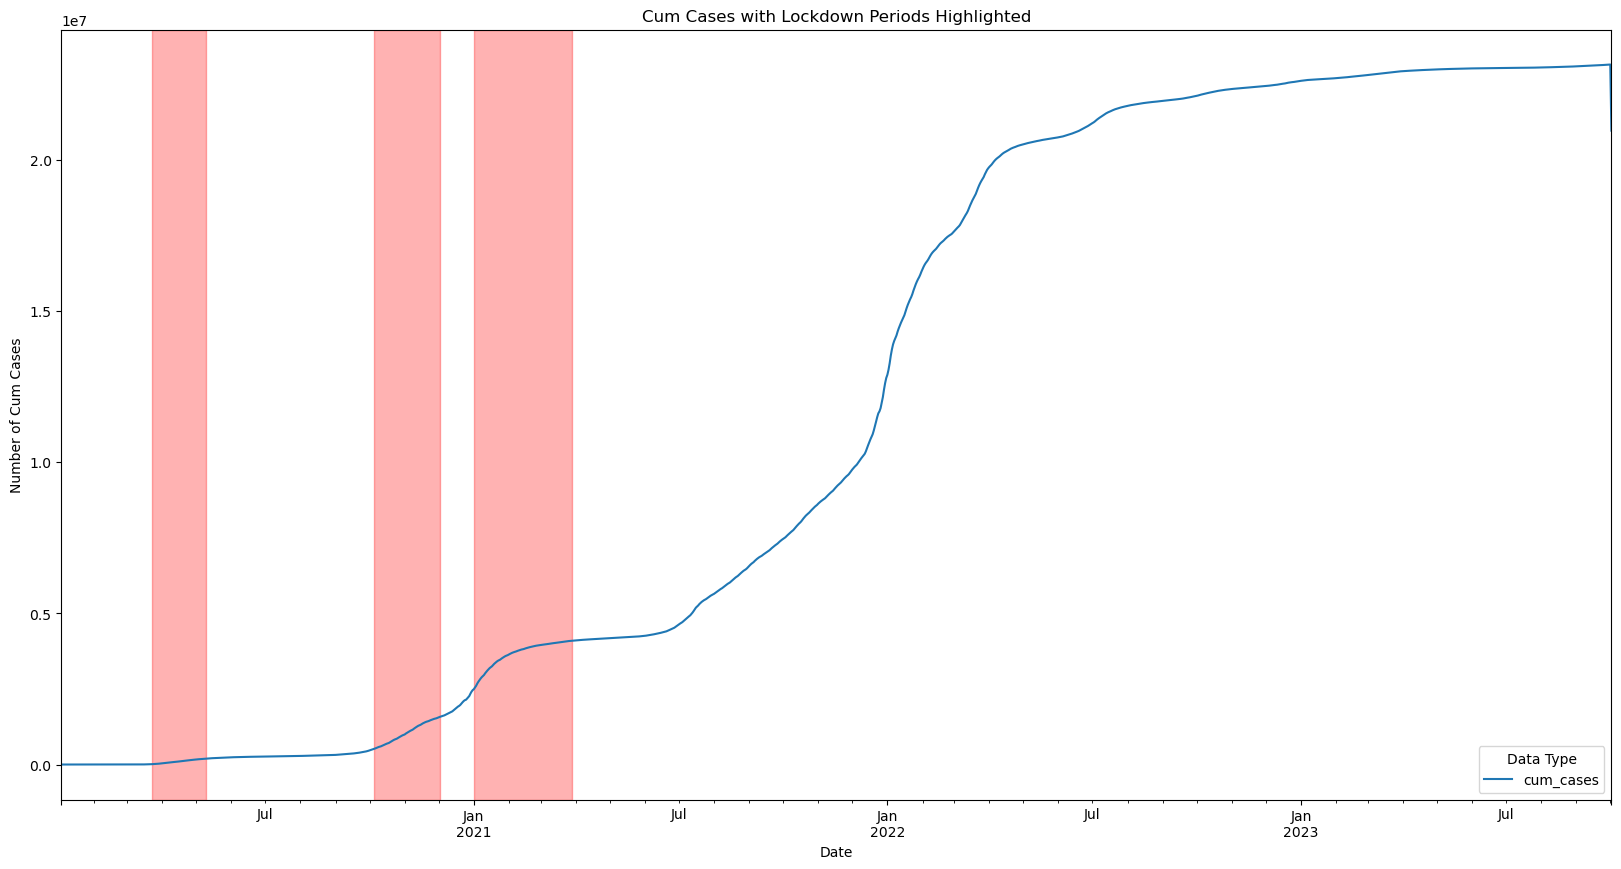

In [17]:

# plotting
fig, ax = plt.subplots(figsize=(20, 10))

# daily cases graph
covid_dataset.set_index('date')[["daily_cases"]].plot(ax=ax)

lockdown_dates=[('2020-03-23','2020-05-10'),("2020-10-05","2020-12-02"),("2021-01-01","2021-03-29")]
for start_date, end_date in lockdown_dates:
    ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='red', alpha=0.3)
    
# adding heading and labels
plt.title('Daily Cases with Lockdown Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='Data Type')


plt.show()
# plotting
fig, ax = plt.subplots(figsize=(20, 10))

# daily cases graph
covid_dataset.set_index('date')[["cum_cases"]].plot(ax=ax)

lockdown_dates=[('2020-03-23','2020-05-10'),("2020-10-05","2020-12-02"),("2021-01-01","2021-03-29")]
for start_date, end_date in lockdown_dates:
    ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='red', alpha=0.3)
    
# adding heading and labels
plt.title('Cum Cases with Lockdown Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Cum Cases')
plt.legend(title='Data Type')


plt.show()

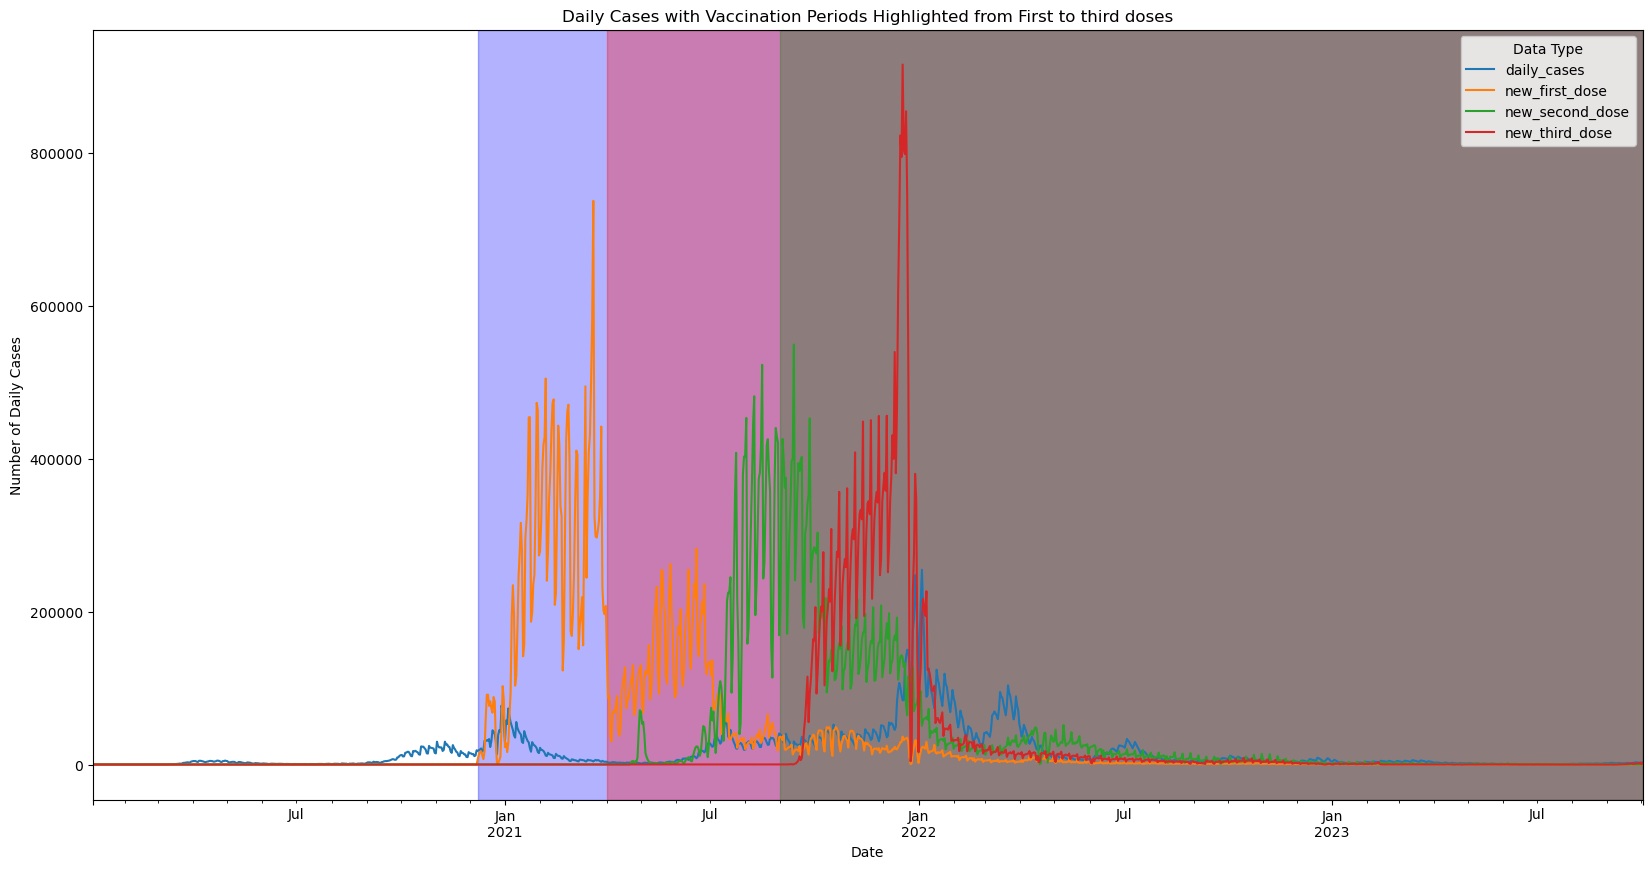

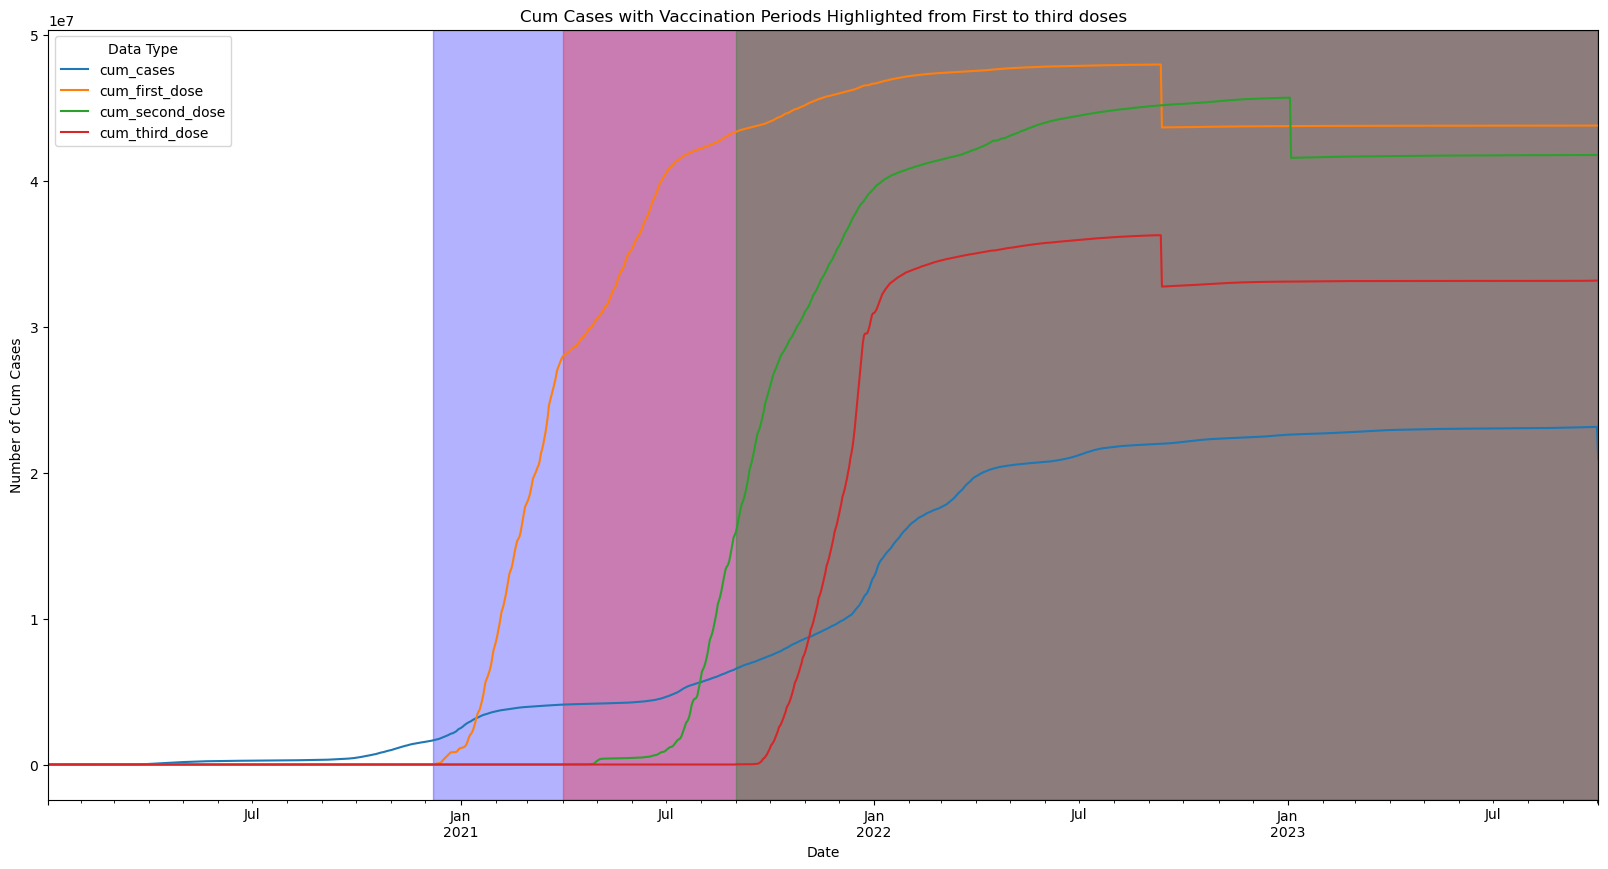

In [22]:
first_dose_start_date="2020-12-08"
second_dose_start_date="2021-04-01"
booster_dose_start_date="2021-09-01"
end_date="2023-10-02"

# plot
fig, ax = plt.subplots(figsize=(20, 10))

# daily cases graph
covid_dataset.set_index('date')[["daily_cases","new_first_dose","new_second_dose","new_third_dose"]].plot(ax=ax)

lockdown_dates=[(first_dose_start_date,end_date,'blue'),(second_dose_start_date,end_date,'red'),(booster_dose_start_date,end_date,'green')]
for start_date, end_date,mycolor in lockdown_dates:
    ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=mycolor, alpha=0.3)
    
    
    
# adding heading and labels
plt.title('Daily Cases with Vaccination Periods Highlighted from First to third doses')
plt.xlabel('Date')
plt.ylabel('Number of Daily Cases')
plt.legend(title='Data Type')


plt.show()

plt.show()
first_dose_start_date="2020-12-08"
second_dose_start_date="2021-04-01"
booster_dose_start_date="2021-09-01"
end_date="2023-10-02"

#plot
fig, ax = plt.subplots(figsize=(20, 10))

# daily cases graph
covid_dataset.set_index('date')[["cum_cases","cum_first_dose","cum_second_dose","cum_third_dose"]].plot(ax=ax)

lockdown_dates=[(first_dose_start_date,end_date,'blue'),(second_dose_start_date,end_date,'red'),(booster_dose_start_date,end_date,'green')]
for start_date, end_date,mycolor in lockdown_dates:
    ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=mycolor, alpha=0.3)
    
    
# adding heading and labels
plt.title('Cum Cases with Vaccination Periods Highlighted from First to third doses')
plt.xlabel('Date')
plt.ylabel('Number of Cum Cases')
plt.legend(title='Data Type')


plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
uk_updated=pd.read_csv("last.csv")
uk_updated['positivity_rate'] = uk_updated['daily_cases'] / (uk_updated['new_pcr_test'])
uk_updated['daily_cases_lag7'] = uk_updated['daily_cases'].shift(7)
uk_updated['new_pcr_test_7day_avg'] = uk_updated['new_pcr_test'].rolling(window=7).mean()
uk_updated['daily_cases_lag14'] = uk_updated['daily_cases'].shift(14)
uk_updated=uk_updated.fillna(0)
uk_updated['date'] = pd.to_datetime(uk_updated['date'])
uk_updated['ds'] = uk_updated['date']
uk_updated['y'] = uk_updated['cum_cases']
uk_updated['days'] = (uk_updated['date'] - uk_updated['date'].min()).dt.days

covid_dataset=uk_updated

C:\Users\enesk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


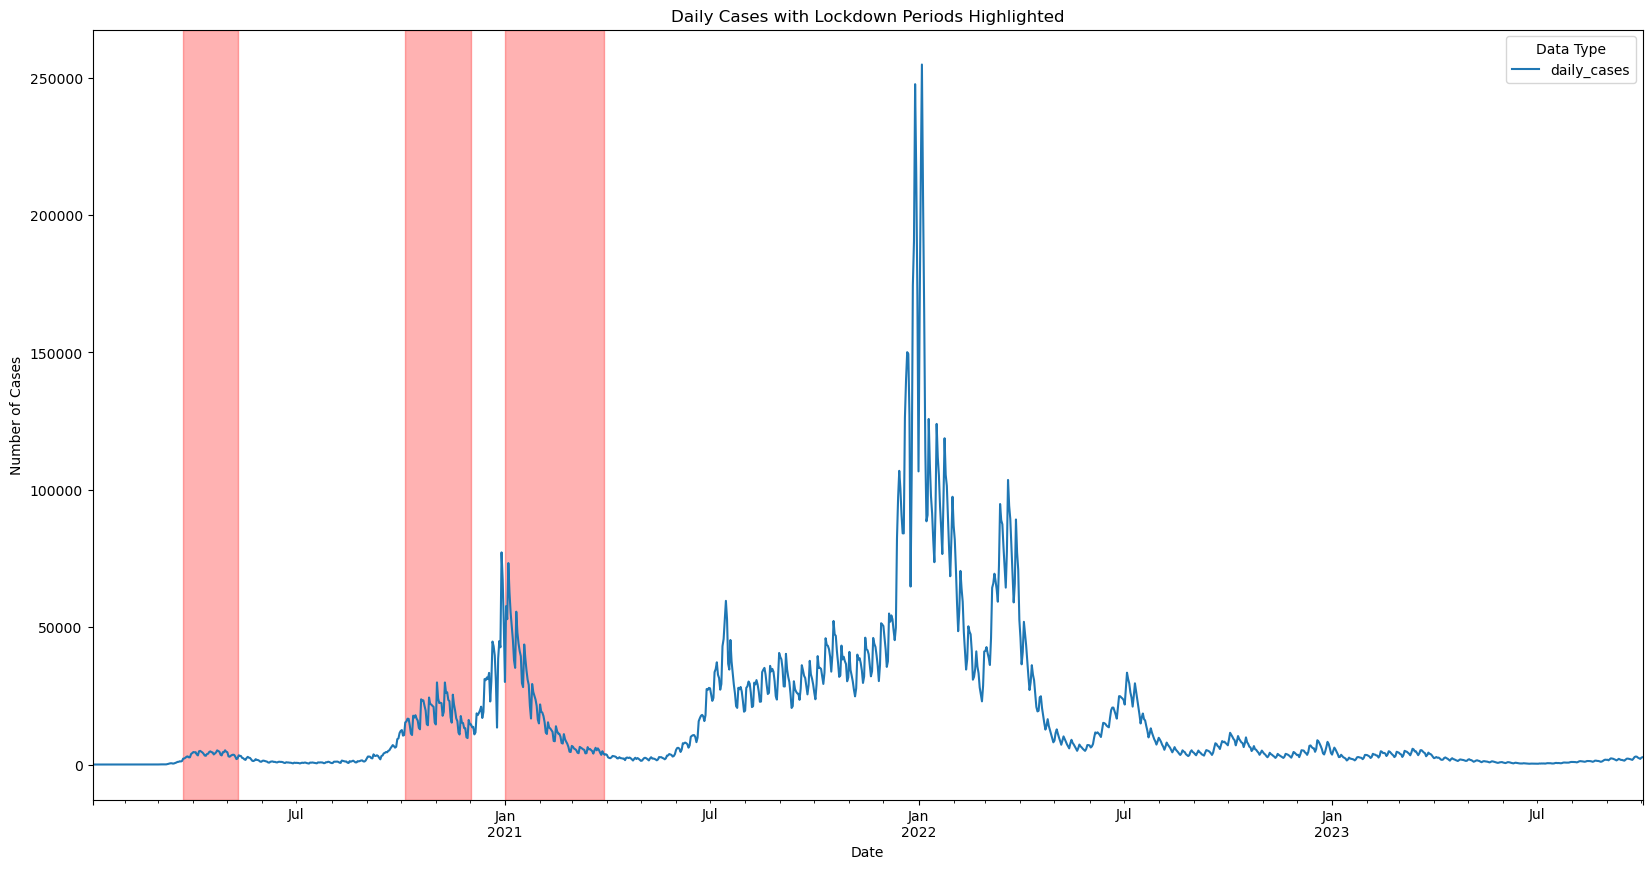

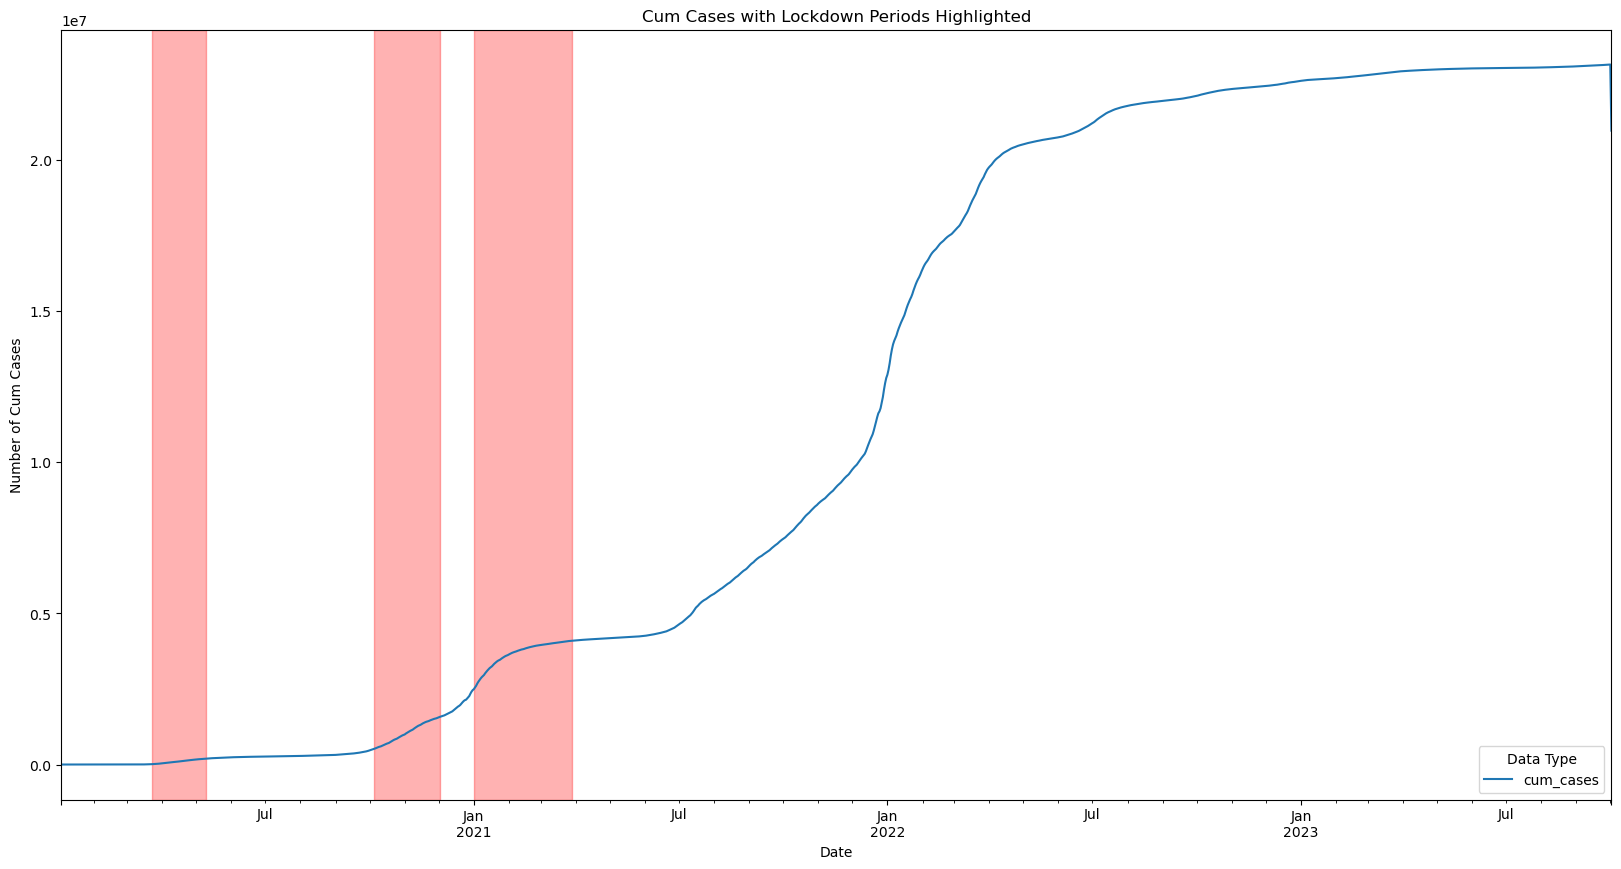

In [2]:

# plotting
fig, ax = plt.subplots(figsize=(20, 10))

# daily cases graph
covid_dataset.set_index('date')[["daily_cases"]].plot(ax=ax)

lockdown_dates=[('2020-03-23','2020-05-10'),("2020-10-05","2020-12-02"),("2021-01-01","2021-03-29")]
for start_date, end_date in lockdown_dates:
    ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='red', alpha=0.3)
    
# adding heading and labels
plt.title('Daily Cases with Lockdown Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='Data Type')


plt.show()
# plotting
fig, ax = plt.subplots(figsize=(20, 10))

# daily cases graph
covid_dataset.set_index('date')[["cum_cases"]].plot(ax=ax)

lockdown_dates=[('2020-03-23','2020-05-10'),("2020-10-05","2020-12-02"),("2021-01-01","2021-03-29")]
for start_date, end_date in lockdown_dates:
    ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='red', alpha=0.3)
    
# adding heading and labels
plt.title('Cum Cases with Lockdown Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Cum Cases')
plt.legend(title='Data Type')


plt.show()